In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import pprint

from collections import Counter

In [2]:
def read_twitter_data(file = 'json_file_location.json'):
    data_frame = pd.read_json(file, 
                               orient='records', 
                               lines=True, 
                               convert_dates=True, 
                               keep_default_dates=True)
    return data_frame

In [3]:
CSU = read_twitter_data(file = 'CSU/CSU_2018-07-09.json')

In [4]:
CSU.name = 'CSU'

In [5]:
CSU.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2018-07-09 07:33:12,"{'hashtags': [{'text': 'CSU', 'indices': [49, ...",NaN,0,False,None,1016223731495120896,1016223731495120896,...,NaN,NaN,NaN,3,False,{'created_at': 'Mon Jul 09 06:27:21 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...","RT @jim_cs_: @ZDFheute Ja genau, jetzt kommt d...",False,"{'id': 776036423103287297, 'id_str': '77603642..."
1,NaN,None,2018-07-09 07:33:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1016223681276727296,1016223681276727296,...,NaN,NaN,NaN,43,False,{'created_at': 'Mon Jul 09 06:28:20 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @Uwe_Junge_MdL: Sie tragen ihren Hass und i...,False,"{'id': 750647177647628288, 'id_str': '75064717..."
2,NaN,None,2018-07-09 07:32:49,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1016223634023702529,1016223634023702528,...,NaN,NaN,NaN,1,False,{'created_at': 'Mon Jul 09 07:31:48 +0000 2018...,"<a href=""https://about.twitter.com/products/tw...",RT @migrate89: Forsa-Umfrage zur Landtagswahl ...,False,"{'id': 78276177, 'id_str': '78276177', 'name':..."
3,NaN,None,2018-07-09 07:32:47,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1016223624934588417,1016223624934588416,...,NaN,NaN,NaN,5,False,{'created_at': 'Mon Jul 09 06:49:43 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @MonikaHerrmann1: Vielleicht will die CSU j...,False,"{'id': 859107610041221125, 'id_str': '85910761..."
4,NaN,None,2018-07-09 07:32:38,"{'hashtags': [{'text': 'Flüchtlingspolitik', '...",NaN,0,False,None,1016223589438287872,1016223589438287872,...,NaN,NaN,NaN,1,False,{'created_at': 'Mon Jul 09 06:55:38 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @Timecop66: Trendbarometer: Mit ihrer #Flüc...,False,"{'id': 2729969164, 'id_str': '2729969164', 'na..."


In [28]:
tweetsCSU = CSU.loc[:, 'text']
len(tweetsCSU)

1321

In [37]:
CSU_new = tweetsCSU.drop_duplicates(inplace=True)
print(len(tweetsCSU))
print(tweetsCSU[3])

851
RT @MonikaHerrmann1: Vielleicht will die CSU ja auch eine starke AfD im Bund. Dann ginge eine Koa ohne SPD mit SchwarzSchwarzBlau, also in…


In [22]:
CSU.loc[:, 'id'].value_counts()

1016155085045313536    1
1016183267777794048    1
1016200875897958400    1
1016200893337923584    1
1016200915135713280    1
1016200916293373953    1
1016218525411790848    1
1016200970785710081    1
1016162024219463682    1
1016189692474200064    1
1016183421067055105    1
1016218597142794240    1
1016173257945427978    1
1016218635759599618    1
1016218628780363776    1
1016218642088939520    1
1016218653740527616    1
1016218667938299904    1
1016218706731417601    1
1016163578624331776    1
1016218439814471681    1
1016199756413067265    1
1016150220667621376    1
1016183037195890694    1
1016218261577400321    1
1016183089880616961    1
1016165497178640384    1
1016200687041105920    1
1016218290052567040    1
1016210272405590018    1
                      ..
1016206762318409728    1
1016189182023172096    1
1016217510709026817    1
1016189240948948997    1
1016206807906189315    1
1016189226122178561    1
1016206812616577024    1
1016203255431348224    1
1016154044375748609    1


In [19]:
AFD = read_twitter_data(file = 'AfD/AfD_2018-07-09.json')

In [20]:
AFD.name = 'AFD'

In [21]:
AFD.loc[:, 'id_str'].value_counts()

1016230201796317184    1
1016207389874368512    1
1016207483038248960    1
1016230624166842368    1
1016207595852492800    1
1016207624059187200    1
1016237084192006144    1
1016137325758304256    1
1016137330925735936    1
1016207710696730624    1
1016207730506379264    1
1016139467722280960    1
1016209811111899136    1
1016207821812232192    1
1016207833522679808    1
1016207861049896960    1
1016207891840282624    1
1016207894612717568    1
1016129030498738176    1
1016207942209728512    1
1016207965039276032    1
1016207997259968512    1
1016207864480878592    1
1016218207810703360    1
1016191831695155200    1
1016206762318409728    1
1016207329853779968    1
1016206798582362112    1
1016206876009263104    1
1016171706623328256    1
                      ..
1016191282253885440    1
1016121011765415936    1
1016191386394210304    1
1016226641759043584    1
1016219232206548992    1
1016167180185014272    1
1016120455562842112    1
1016222047855357952    1
1016190378624593920    1


In [7]:
CDU = read_twitter_data(file = 'CDU/CDU_2018-07-09.json')

In [8]:
CDU.name = 'CDU'

In [9]:
Gruene = read_twitter_data(file = 'Gruene/Gruene_2018-07-09.json')

In [10]:
Gruene.name = 'Gruene'

In [11]:
SPD = read_twitter_data(file = 'SPD/SPD_2018-07-09.json')

In [12]:
SPD.name = 'SPD'

In [13]:
SPDDE = read_twitter_data(file = 'spdde/spdde_2018-07-09.json')

In [14]:
SPDDE.name = 'SPDDE'

In [15]:
Linke = read_twitter_data(file = 'LINKE/LINKE_2018-07-09.json')

In [16]:
Linke.name = 'LINKE'

In [20]:
FDP = read_twitter_data(file = 'FDP/FDP_2018-07-09.json')

ValueError: Expected object or value

In [18]:
FDP.name = 'FDP'

NameError: name 'FDP' is not defined

In [19]:
# CSU['lang'].value_counts()

In [20]:
list_dataframes = [CSU, AFD, CDU, Gruene, SPD, SPDDE, Linke]

In [21]:
def index(dataframes_list):
    for df in list_dataframes:
        df.set_index(pd.DatetimeIndex(df['created_at']), inplace=True)

In [22]:
index(list_dataframes)

In [23]:
def extract_location(x):
    """
    use with apply
    """
    return x['location']

In [24]:
def location_column(dataframe_list):
    """
    create a new column: 'location'
    """
    for df in dataframe_list:
        df['location'] = df.user.map(extract_location)

In [25]:
location_column(list_dataframes)

In [26]:
frames = dict()
def extract_languages(dataframes):
    """
    iterates over the list of dataframes and extracts the language column from each frame.
    value_counts outputs a key : value pair with language as key and value_counts per language as value
    value_counts output is assigned to an empty dictionary
    """
    
    for df in dataframes:                                     
         frames[str(df.name)] = (df.loc[:, 'lang'].value_counts(dropna = False))
    return frames

In [21]:
#extract_languages(list_dataframes)

In [145]:
languages = pd.DataFrame.from_dict(frames)
languages.name = 'Languages'
languages.head()

,CSU,AFD,CDU,Gruene,SPD,SPDDE,LINKE
ar,2.0,10.0,NaN,NaN,3.0,NaN,1.0
ca,NaN,1.0,10.0,NaN,NaN,NaN,46.0
cs,NaN,3.0,NaN,NaN,13.0,NaN,NaN
cy,NaN,1.0,NaN,NaN,NaN,NaN,NaN
da,2.0,21.0,2.0,NaN,2.0,1.0,2.0


In [405]:
summe = np.sum(languages.loc[:, 'CSU'])
summe


2707.0

In [411]:
def relative_languages(x):
    xs = np.sum(x)
    y = x.values/xs
    return y

In [420]:
langs = languages.copy()

In [421]:
def calculate_relative_languages(df):
    for x in df:
        langs = df.apply(relative_languages)
        return langs
        

In [422]:
rel_langs = calculate_relative_languages(languages)
rel_langs.head()

,CSU,AFD,CDU,Gruene,SPD,SPDDE,LINKE
ar,0.000739,0.000928,NaN,NaN,0.000593,NaN,0.000323
ca,NaN,0.000093,0.004866,NaN,NaN,NaN,0.014843
cs,NaN,0.000278,NaN,NaN,0.002572,NaN,NaN
cy,NaN,0.000093,NaN,NaN,NaN,NaN,NaN
da,0.000739,0.001949,0.000973,NaN,0.000396,0.002088,0.000645


In [603]:
def sorting_plot(df):
    for column in df:
        # sort the columns by value - truncate to get the 5 most frequent languages
        sorteddf = df.loc[:,column].sort_values(ascending=False).reset_index()
        largest5 = sorteddf.truncate(after = 4)
        largest5.set_index('index', inplace = True)
        # calculate percentage of all other languages
        largest5.loc['other', :] = 1 - np.sum(largest5)
       # largest5 = largest5.pivot(columns=index)
        print(largest5)
        # plot
        plt.pie(largest5)
        plt.axis('equal')
        plt.title(str(column))
        plt.show()

            CSU
index          
de     0.694865
en     0.110085
tl     0.106391
und    0.019209
ja     0.018840
other  0.050610


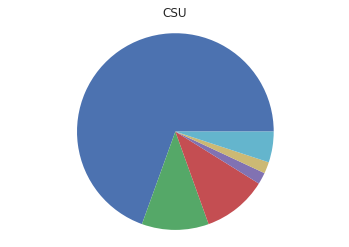

            AFD
index          
de     0.750534
en     0.178283
fr     0.017912
nl     0.013643
und    0.011694
other  0.027935


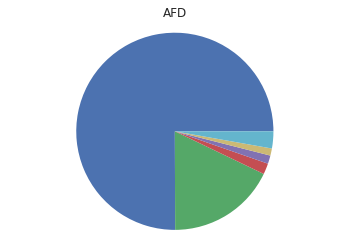

            CDU
index          
de     0.863260
en     0.065207
ja     0.009732
tl     0.009246
fr     0.009246
other  0.043309


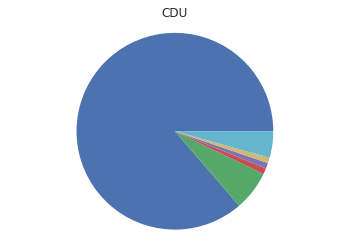

         Gruene
index          
de     0.961873
en     0.016054
und    0.009365
ja     0.006020
es     0.002007
other  0.004682


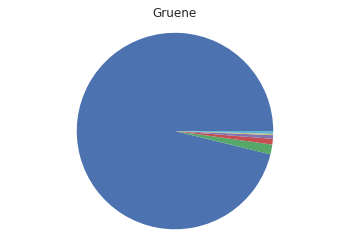

            SPD
index          
de     0.725223
ja     0.087834
en     0.085856
pt     0.023541
und    0.017211
other  0.060336


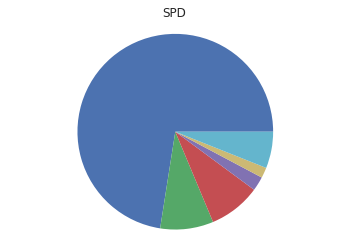

          SPDDE
index          
de     0.949896
und    0.027140
pl     0.006263
nl     0.004175
en     0.004175
other  0.008351


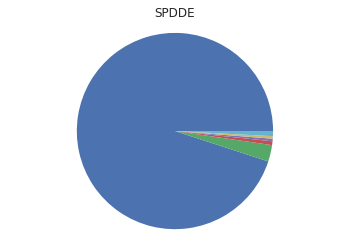

          LINKE
index          
de     0.668603
es     0.222330
tr     0.035173
fr     0.021620
en     0.015166
other  0.037109


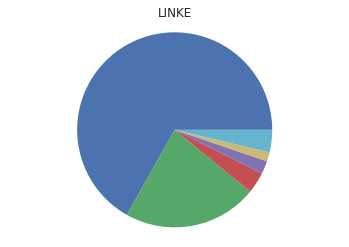

In [604]:
sorting_plot(rel_langs)

In [482]:
def plots(dataframe):
    for column in dataframe:
        plt.pie(dataframe.loc[:, column].nlargest(5), )
        plt.axis('equal')
        plt.title(str(column))
        plt.show()


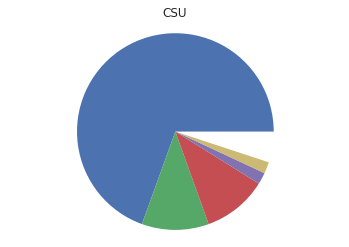

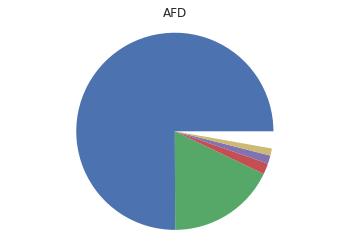

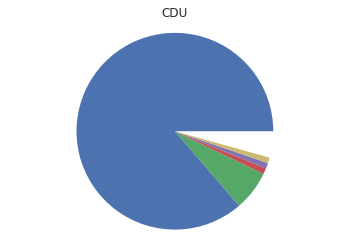

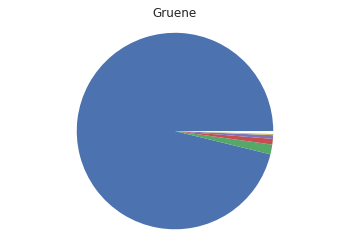

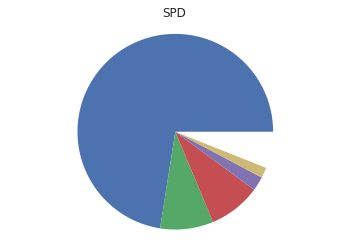

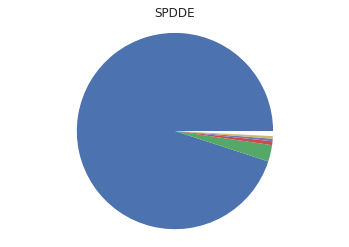

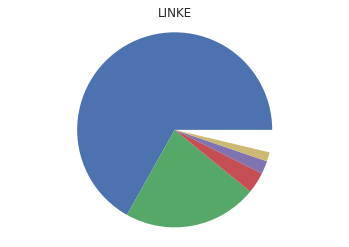

In [472]:
plots(rel_langs)

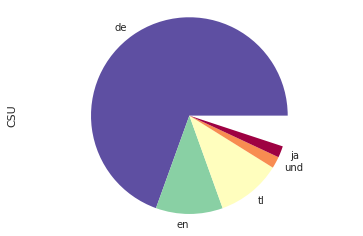

In [457]:
CSU_lang = rel_langs.loc[:, 'CSU'].nlargest(5)
CSU_lang.plot.pie(cmap = 'Spectral_r')
plt.axis('equal')
plt.show()

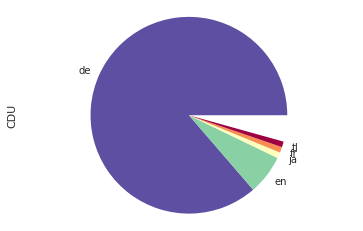

In [458]:
CDU_lang = rel_langs.loc[:, 'CDU'].nlargest(5)
CDU_lang.plot.pie(cmap = 'Spectral_r')
plt.axis('equal')
plt.show()

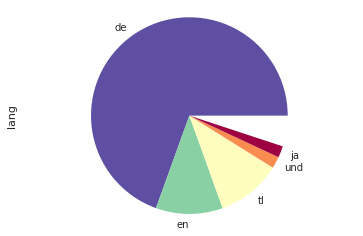

In [25]:
relative_language_CSU.head(5).plot.pie(cmap = 'Spectral_r')
plt.axis('equal')
plt.show()

In [39]:
# languages = [] # empty list
# language_proportion = [] # empty list that will contain dictionaries: {language: number of values}

In [43]:
# def languages_per_df(dataframes):
    
#     """
#     returns a dictionary for every language:language_proportion pair in a dataframe 
#     -> list of dictionaries
#     """
    
#     for df in dataframes:
#         df.name = []
    

SyntaxError: can't assign to operator (<ipython-input-43-08d9d93f5100>, line 9)

In [42]:
# languages_per_df(list_dataframes)

In [36]:
# def extract_languages(dataframes):
#     for df in dataframes:        
#         for language in df.loc[:, 'lang']:
#             if language in languages:
#                 languages[language] += 1
#             else:
#                 languages[language] = 1
#     return languages

In [38]:
# extract_languages(list_dataframes)
# print(languages)

TypeError: list indices must be integers or slices, not str

In [38]:
        
            
            
#                 relative_language = languages.value_counts()/len(df.languages)
#         language_proportion[language].append(relative_language)
#     return language_proportion

SyntaxError: invalid syntax (<ipython-input-38-60ca1b51a54c>, line 17)

In [36]:
# language(list_dataframes)

AttributeError: 'list' object has no attribute 'value_counts'